### The Problem Statement

The data operationsteam at BigMarthave collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

BigMart wants to understand the properties of products and stores which play a key role in increasing sales.

We will explore the problem in following stages:

1) Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome

2) Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.

3) Data Cleaning – imputing missing values in the data and checking for outliers

4) Feature Engineering – modifying existing variables and creating new ones for analysis

5) Model Building – making predictive models on the data

### 1. Hypothesis Generation

#### Store Level Hypotheses:

1) City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

2) Population Density: Stores located in densely populated areas should have higher sales because of more demand.

3) Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place

4) Competitors: Stores having similar establishments nearby should have less sales because of more competition.

5) Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.

6) Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.

7) Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

#### Product Level Hypotheses:

1) Brand: Branded products should have higher sales because of higher trust in the customer.

2) Packaging: Products with good packaging can attract customers and sell more.

3) Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.

4) Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.

5) Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

6) Advertising: Better advertising of products in the store will should higher sales in most cases.

7) Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

### 2. Data Exploration

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Read files:
data = pd.read_csv(r"C:\Users\MRAVI\Desktop\Business Analytics\Module 02_Applied Statistics\Assignment\Retail_Analytics_BigMart_SalesData.csv", sep=";")

In [274]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [275]:
data.shape

(8523, 12)

In [276]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [277]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [278]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.55,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


#### Item_Visibility  has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

#### Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

#### The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

In [279]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable. I’ll exclude the ID and source variables for obvious reasons.

C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 1.177531 , highly skewed


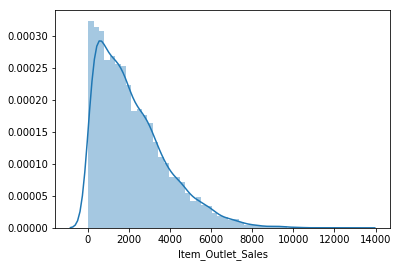

In [280]:
sns.distplot(data["Item_Outlet_Sales"])
print('Skewness: %f' % data['Item_Outlet_Sales'].skew(), ", highly skewed")

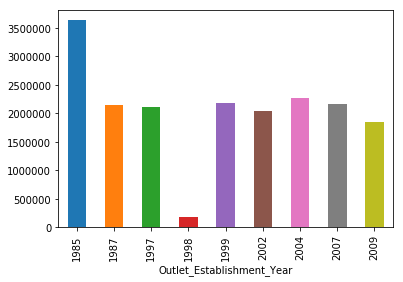

In [281]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().plot.bar()

In [282]:
pd.set_option('display.float_format', '{:.2f}'.format)
table = data.pivot_table(values='Item_Outlet_Sales', index='Item_Type', aggfunc = np.sum, margins=True, fill_value=0)
table

,Item_Outlet_Sales
Item_Type,
Baking Goods,1265525.34
Breads,553237.19
Breakfast,232298.95
Canned,1444151.49
Dairy,1522594.05
Frozen Foods,1825734.79
Fruits and Vegetables,2820059.82
Hard Drinks,457793.43
Health and Hygiene,1045200.14


In [283]:
print(table.iloc[:-1].div(table.iloc[-1], axis=1) * 100)

                       Item_Outlet_Sales
Item_Type                               
Baking Goods                        6.81
Breads                              2.98
Breakfast                           1.25
Canned                              7.77
Dairy                               8.19
Frozen Foods                        9.82
Fruits and Vegetables              15.17
Hard Drinks                         2.46
Health and Hygiene                  5.62
Household                          11.06
Meat                                4.94
Others                              1.75
Seafood                             0.80
Snack Foods                        14.70
Soft Drinks                         4.80
Starchy Foods                       1.89


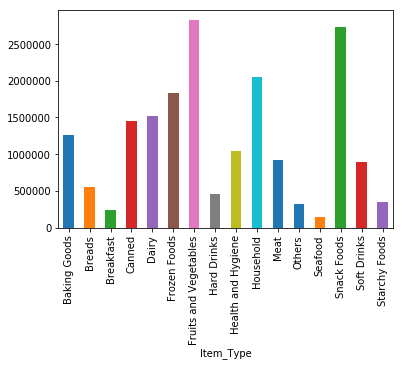

In [284]:
data.groupby('Item_Type')['Item_Outlet_Sales'].sum().plot.bar()

In [285]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

#### The output gives us following observations:

##### Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.

##### Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.

##### Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

#### Imputing Missing Values

In [286]:
itemAvgWt = data.pivot_table(values='Item_Weight', index='Item_Identifier')
getBooleanData = data['Item_Weight'].isnull() 
print ('Original #missing: %d'% sum(getBooleanData))
data.loc[getBooleanData,'Item_Weight'] = data.loc[getBooleanData,'Item_Identifier'].apply(lambda x: itemAvgWt.loc[x] )
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Original #missing: 1463
Final #missing: 4


In [287]:
getBooleanData = data['Item_Weight'].isnull() 
sum(getBooleanData)

4

In [288]:
data['Item_Weight'].head(10)

0    9.30
1    5.92
2   17.50
3   19.20
4    8.93
5   10.39
6   13.65
7   19.00
8   16.20
9   19.20
Name: Item_Weight, dtype: float64

In [289]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Final #missing: 0


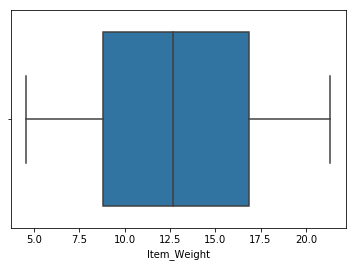

In [290]:
sns.boxplot(x = "Item_Weight", data = data)

In [292]:
#Import mode function:
from scipy.stats import mode

getBooleanData = data['Outlet_Size'].isnull() 
data['Outlet_Size'].fillna('Small',inplace=True)
outletSizeMode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print ('Mode for each Outlet_Type:')
print (outletSizeMode)

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(getBooleanData))
data.loc[getBooleanData,'Outlet_Size'] = data.loc[getBooleanData,'Outlet_Type'].apply(lambda x: outletSizeMode.loc[x])
print ('Final #missing: %d'% sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 0
Final #missing: 0


C:\Users\MRAVI\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [293]:
table = data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type', aggfunc = np.sum, margins=True, fill_value=0)
table

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,368034.27
Supermarket Type1,12917342.26
Supermarket Type2,1851822.83
Supermarket Type3,3453926.05
All,18591125.41


In [294]:
print(table.iloc[:-1].div(table.iloc[-1], axis=1) * 100)

                   Item_Outlet_Sales
Outlet_Type                         
Grocery Store                   1.98
Supermarket Type1              69.48
Supermarket Type2               9.96
Supermarket Type3              18.58


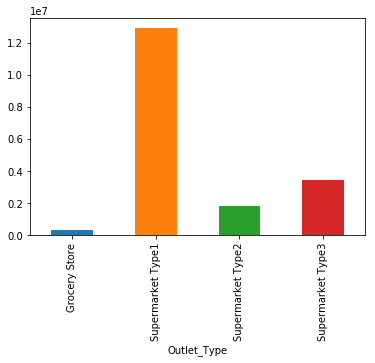

In [295]:
data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().plot.bar()

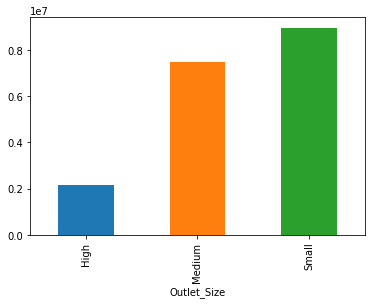

In [296]:
data.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().plot.bar()

In [297]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 526
Number of 0 values after modification: 0


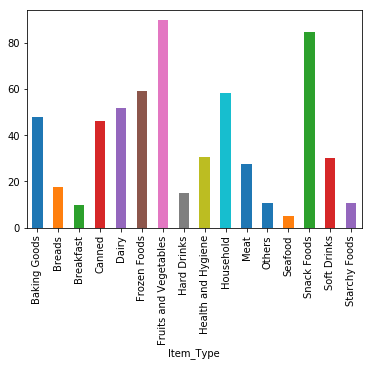

In [298]:
data.groupby('Item_Type')['Item_Visibility'].sum().plot.bar()

##### The columns "Item_Type" has 16 different categories. Lets club them together fewer amount of categories

In [224]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
print(data['Item_Type_Combined'].value_counts())
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64


Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

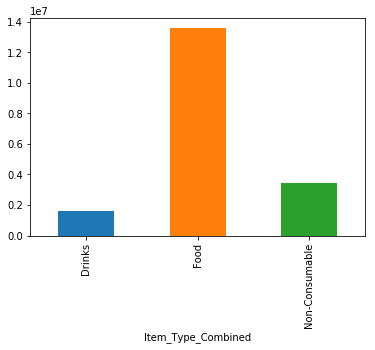

In [225]:
data.groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum().plot.bar()

Lets modify the redundant entries of "Item_Fat_Content" into similar ones

In [227]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [228]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [229]:
table = data.pivot_table(values='Item_Outlet_Sales', index='Item_Type_Combined', aggfunc = np.sum, margins=True, fill_value=0)
table

,Item_Outlet_Sales
Item_Type_Combined,
Drinks,1595869.34
Food,13569044.61
Non-Consumable,3426211.46
All,18591125.41


In [230]:
print(table.iloc[:-1].div(table.iloc[-1], axis=1) * 100)

                    Item_Outlet_Sales
Item_Type_Combined                   
Drinks                           8.58
Food                            72.99
Non-Consumable                  18.43


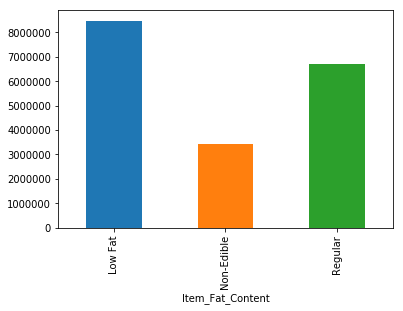

In [231]:
data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().plot.bar()

In [232]:
table = data.pivot_table(values='Item_Outlet_Sales', index='Item_Fat_Content', aggfunc = np.sum, margins=True, fill_value=0)
table

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,8477883.07
Non-Edible,3426211.46
Regular,6687030.88
All,18591125.41


In [233]:
print(table.iloc[:-1].div(table.iloc[-1], axis=1) * 100)

                  Item_Outlet_Sales
Item_Fat_Content                   
Low Fat                       45.60
Non-Edible                    18.43
Regular                       35.97


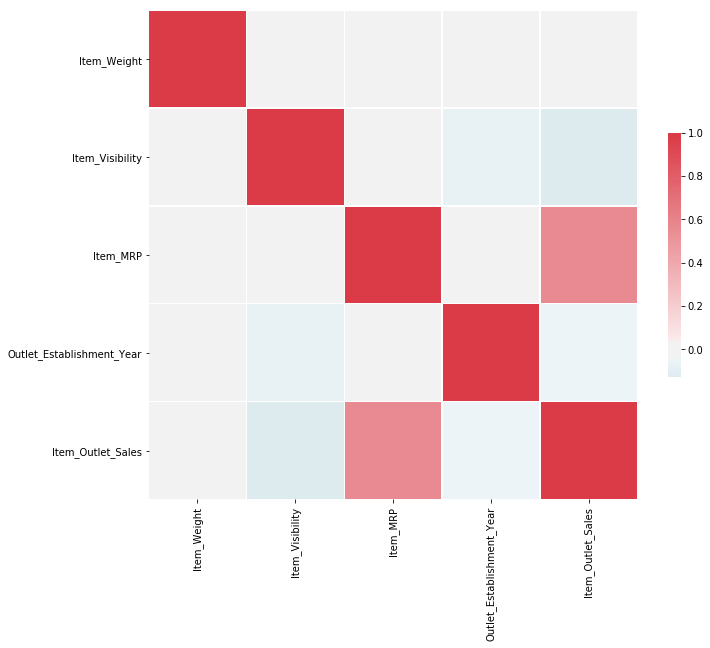

In [299]:
#Plotting correlation
corr = data.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with sns heatmap
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Lets start encoding the non-numeric columns 

In [143]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [144]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [145]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


### Github Link